# Project Description
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

Dataframe Description:
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, predict if an arbitrary passenger on Titanic would survive the sinking or not.

Feature Columns:

Pclass : Passenger Ticket Class

Sex : Sex of Passengers

Age : Age of Passengers

Parch : Number of parents / children onboard

sibsp : Number of siblings / spouses onboard

Embarked: Port from which the passenger Embarked

Fare : Ticket Fare

Cabin : Cabin's number

Target Column:

Survived: Whether Survived or not

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics #accuracy measure
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix #for confusion matrix

In [66]:
titanic=pd.read_csv("titanic_train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [67]:
#checking total no. of rows & columns
titanic.shape 

(891, 12)

In [68]:
 #statistical summary
titanic.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From  the above datasets we have noticed that there is huge range difference between min & max values of few columns.

In [69]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are null values present in Age, cabin , embarked columns

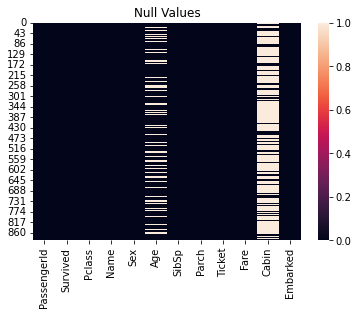

In [70]:
sns.heatmap(titanic.isnull())
plt.title('Null Values')
plt.show()

'Age','Cabin' and 'Embarked' have missing values thus need to clean the data

In [71]:
#Cabin has maximum missing values so cleaning it by dropping the column as its not contributing much.
titanic.drop(['Cabin'],axis=1,inplace=True)

In [72]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [73]:
Age_mean=titanic['Age'].mean()

In [74]:
titanic['Age']=titanic['Age'].fillna(Age_mean)

In [75]:
titanic['Embarked'].fillna('S', inplace=True)

In [76]:
titanic['Age'].isnull().sum()

0

In [77]:
titanic['Embarked'].isnull().sum()

0

0 null values are present in column 'Age'

In [78]:
features=titanic[["Pclass","Sex","Age","Fare"]]
target=titanic["Survived"]

 'Sex' column is not present in numeric value thus we need to convert it into numeric using Label Encoder

In [79]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [80]:
titanic['Sex']=le.fit_transform(titanic['Sex'])

In [81]:
titanic['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,1


As now we have converted the dataset of sex column into numeric value

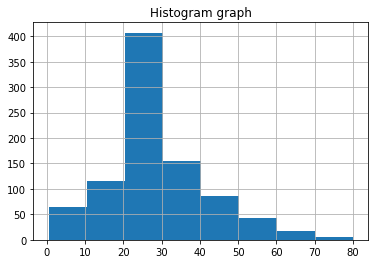

In [82]:
#Applying the univariant for EDA analaysis
titanic['Age'].hist(bins=8)
plt.title('Histogram graph')
plt.show()

Text(0.5, 1.0, 'Survival Distribution')

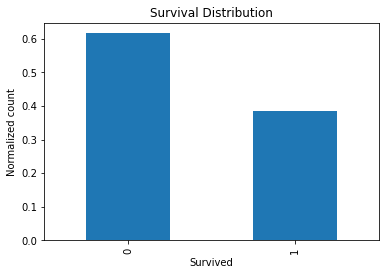

In [83]:
titanic['Survived'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Survived')
plt.ylabel('Normalized count')
plt.title('Survival Distribution')

Survival percentage contribiutes to 40% and people dies contributes to 60%

Text(0.5, 1.0, 'Ticket class Distribution')

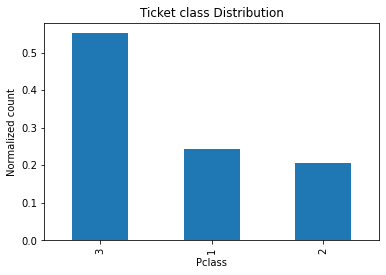

In [84]:
titanic['Pclass'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Normalized count')
plt.title('Ticket class Distribution')

Datasets concludes that more than 50% people have booked Class 3 tickets.

Text(0.5, 1.0, 'Gender Distribution')

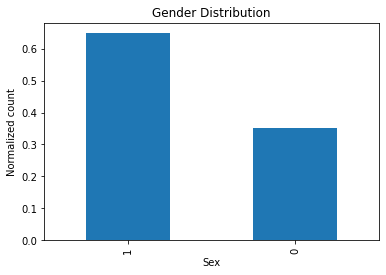

In [85]:
titanic['Sex'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Normalized count')
plt.title('Gender Distribution')

Number of males(1) are twice that of females(0) passengers.

Text(0.5, 1.0, 'Age Distribution')

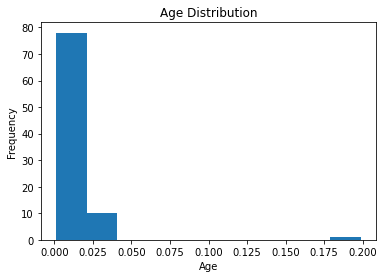

In [86]:
titanic['Age'].value_counts(normalize=True).plot(kind='hist')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

Now we can calculate the median age of passengers who are grouped by ticket class and sex as well assigning the null values to present in those groups.

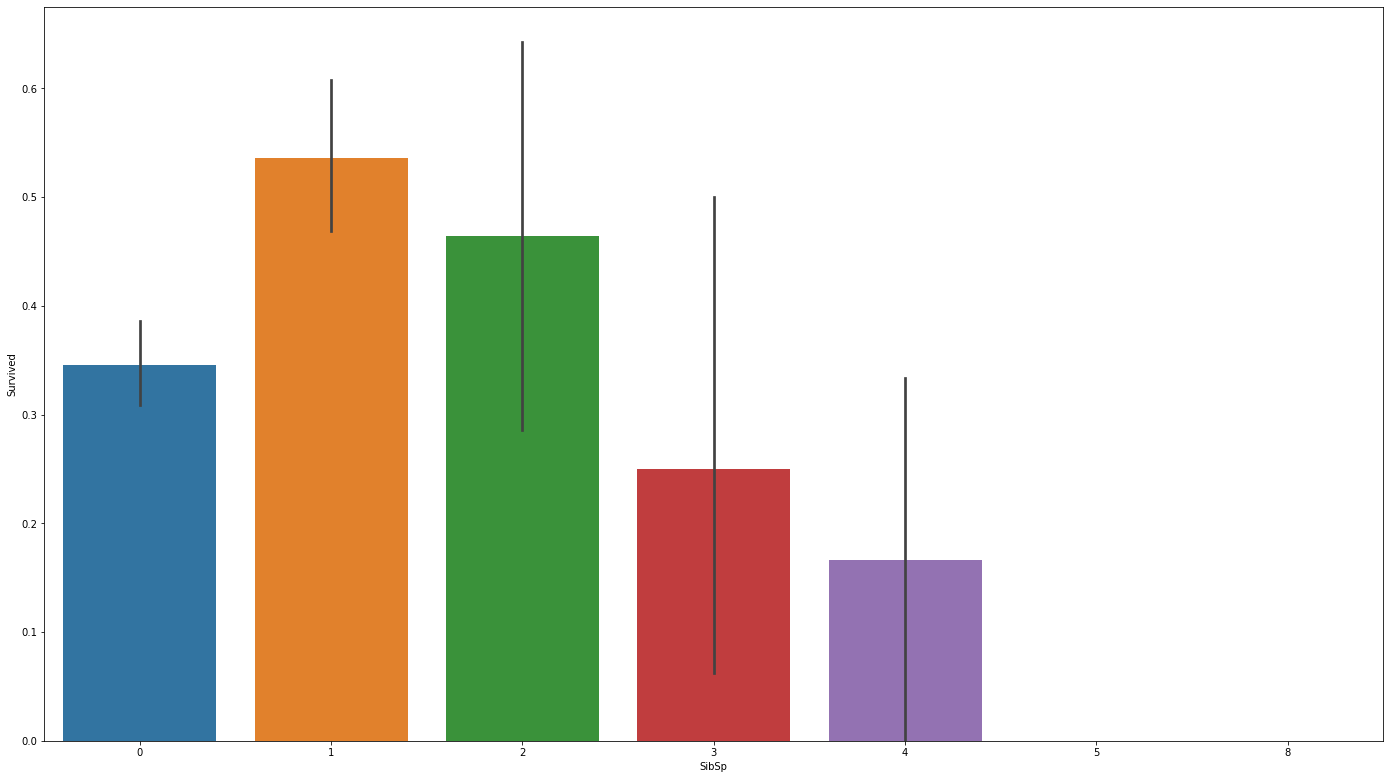

In [87]:
plt.figure(figsize=(24,13.5))
sns.barplot(data=titanic, x='SibSp', y='Survived')
plt.show()

In [88]:
#Filling null values with median value
titanic['Age']=titanic.groupby(['Sex','Pclass'])['Age'].transform(lambda x:x.fillna(x.median()))

Visualizating the data as how the features are related to target variable i.e. whether Survived or not

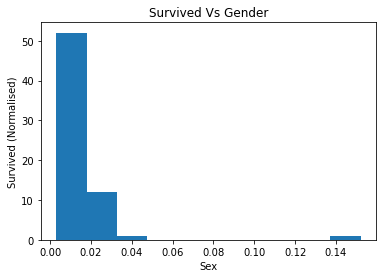

In [89]:
titanic['Age'][titanic['Survived']==1].value_counts(normalize=True, ascending=True).plot(kind='hist')
plt.title('Survived Vs Gender')
plt.xlabel('Sex')
plt.ylabel('Survived (Normalised)')
plt.show()

In [90]:
#Checking Correlation
titanic.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,-0.057527,-0.001652,0.012658,-0.030467
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.045702
Sex,0.042939,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,-0.116569
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,0.007461
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,-0.059961
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,-0.078665
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,0.062142
Embarked,-0.030467,0.106811,0.045702,-0.116569,0.007461,-0.059961,-0.078665,0.062142,1.000000


<AxesSubplot:>

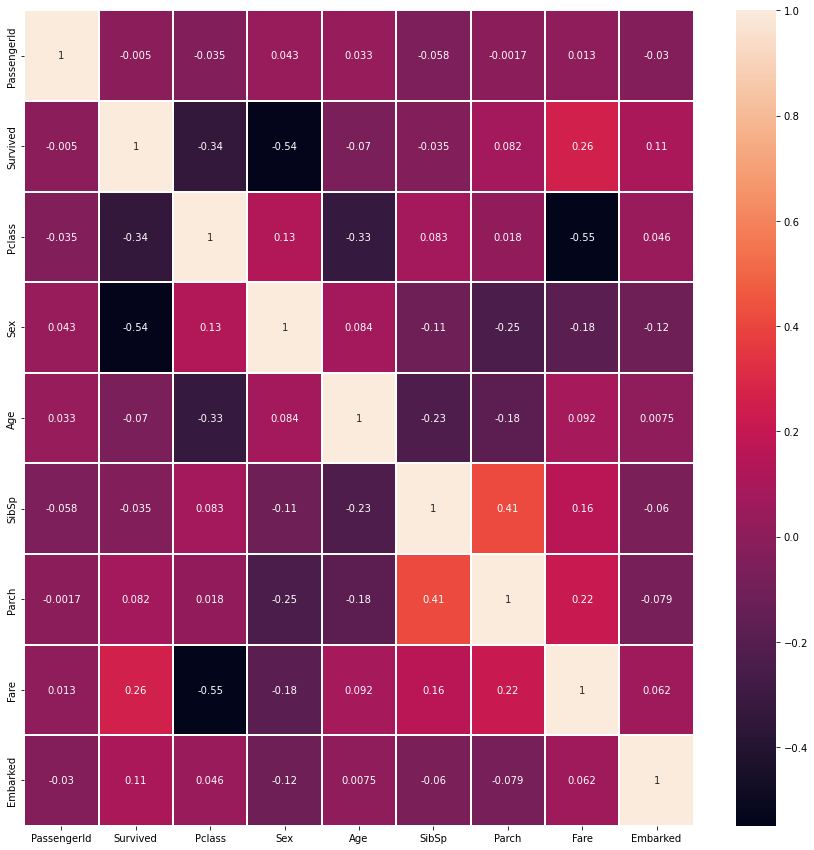

In [91]:
plt.figure(figsize=(15,15))
sns.heatmap(titanic.corr(),annot=True,linewidths=0.2)

we can noticed that features are not much correlated with each other.

In [92]:
titanic.drop(['Name','Ticket','Fare','PassengerId'],axis=1,inplace=True)

In [93]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,0
1,1,1,0,38.0,1,0,1
2,1,3,0,26.0,0,0,0
3,1,1,0,35.0,1,0,0
4,0,3,1,35.0,0,0,0


In [94]:
#titanic.drop(['Embarked'],axis=1,inplace=True)
#x = titanic.drop(labels = "Survived", axis = 1)
#y = titanic["Survived"].values.reshape(-1, 1)
#x.shape

x=titanic[titanic.columns[1:]]
y=titanic['Survived']

y.shape

(891,)

In [95]:
#Spliting the X & Y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [96]:

titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

Using the Logistic regression model for testing 

In [97]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(predlr,y_test))

The accuracy of the Logistic Regression is 0.8100558659217877


In [98]:
# KNeighbors Classifier
knn = KNeighborsClassifier(n_neighbors= 7) 
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)

print('The accuracy of the KNeighborsClassifier is',confusion_matrix(predlr,y_test))

The accuracy of the KNeighborsClassifier is [[90 19]
 [15 55]]


In [99]:
#Random Forest Classifier
model = RandomForestClassifier()
model.fit(x_train, y_train)
predmodel=model.predict(x_test)

print('The accuracy of the Randonforestclassifier is',metrics.accuracy_score(predlr,y_test))

The accuracy of the Randonforestclassifier is 0.8100558659217877


In [100]:
# Decision Tree Classifier

dt = DecisionTreeClassifier() 
dt.fit(x_train, y_train)  
preddt = dt.predict(x_test) 

print('The accuracy of the Decision Tree Classifier is',metrics.accuracy_score(preddt,y_test))

The accuracy of the Decision Tree Classifier is 0.776536312849162


Conclusion-Applying different model and analysing the accuracy it can be inferred that Randonforestclassifier be best model for accurate prediction of survival